In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go

style.use("ggplot")

# Reading data




In [2]:
df = pd.read_csv('C:/Users/OWNER/Desktop/MLProjects/dataset/Instagram.csv',encoding='latin-1')

In [3]:
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


No null values

# Data Exploration 

Lets do some quick data analysis on some of the features 

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


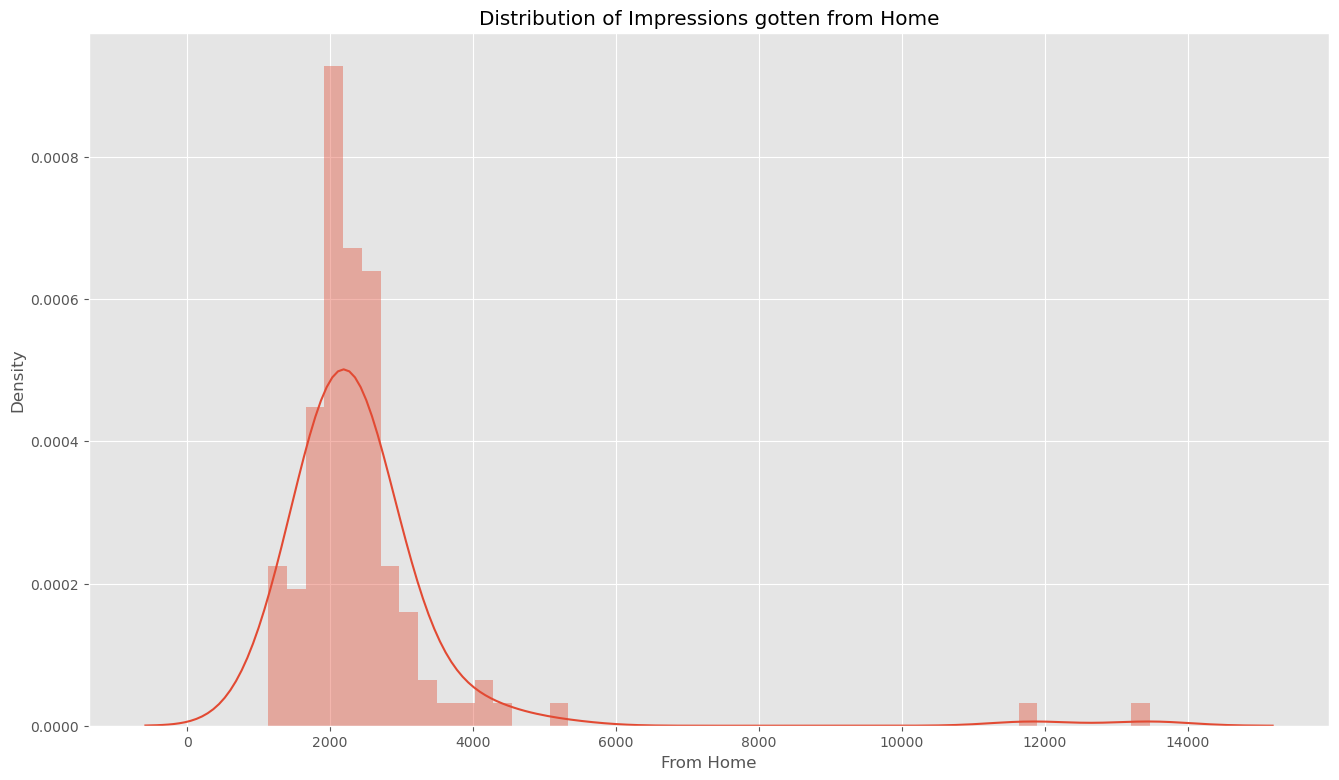

In [5]:
#distribution plot of impressions from home
plt.figure(figsize=(16,9))
plt.title('Distribution of Impressions gotten from Home')
sns.distplot(df["From Home"])
plt.show()

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


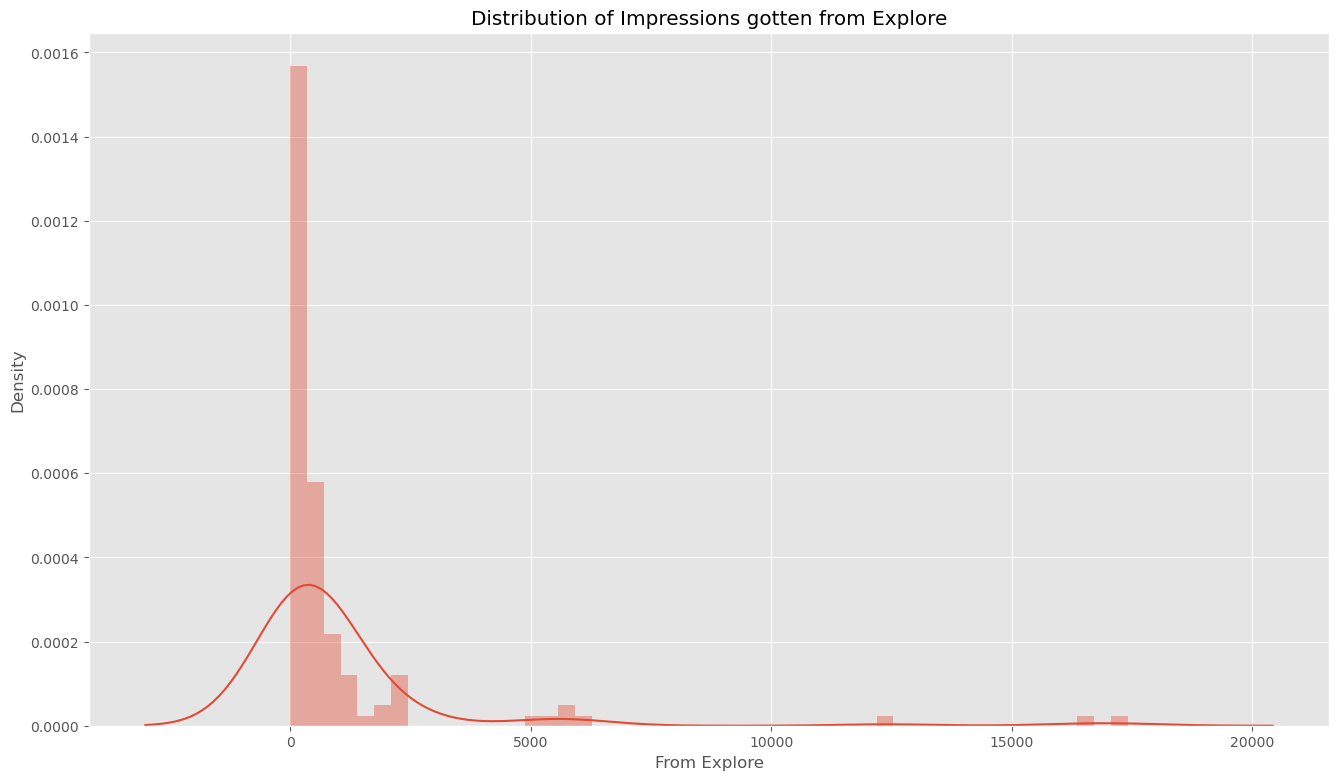

In [6]:
# Distribution plot of Impressions gotten from Explore
plt.figure(figsize=(16,9))
plt.title('Distribution of Impressions gotten from Explore')
sns.distplot(df["From Explore"])
plt.show()

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


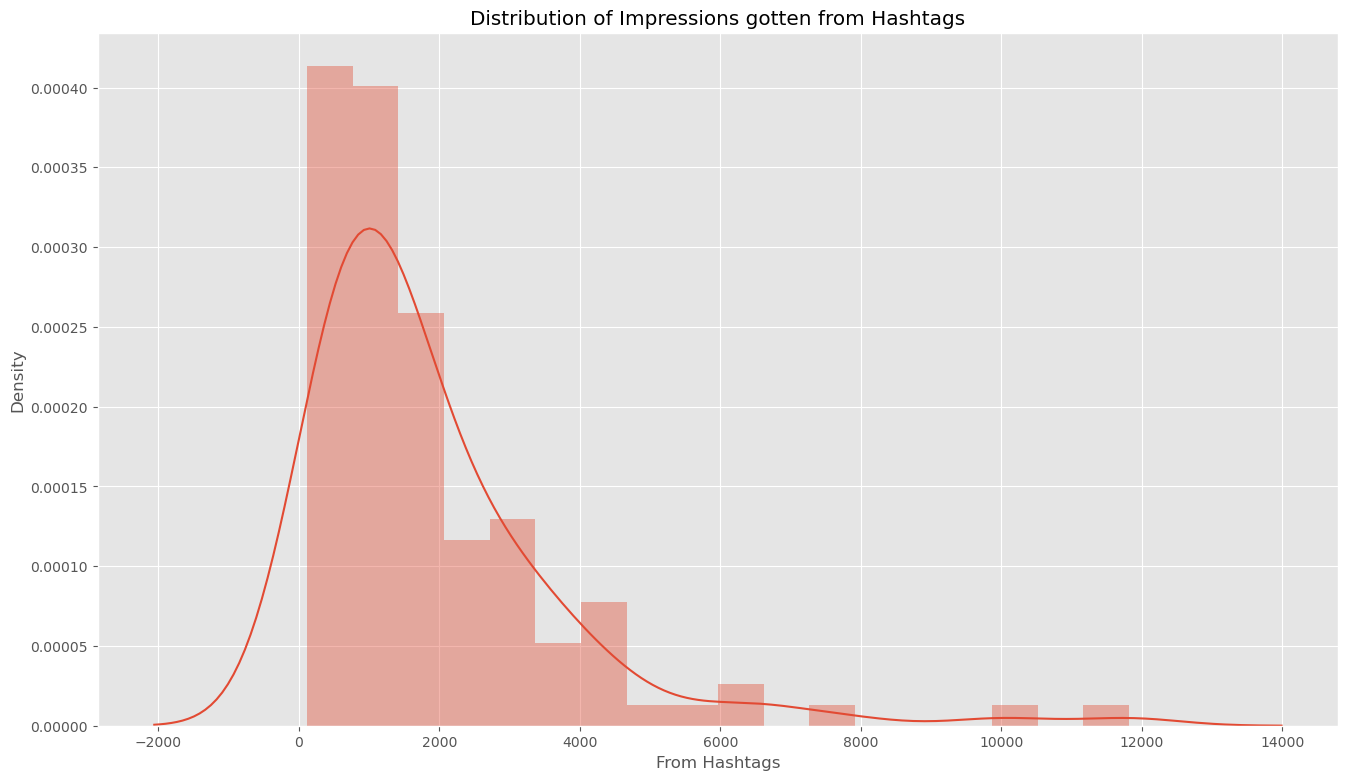

In [7]:
# Distribution plot of Impressions gotten from Hashtags
plt.figure(figsize=(16,9))
plt.title('Distribution of Impressions gotten from Hashtags')
sns.distplot(df["From Hashtags"])
plt.show()

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


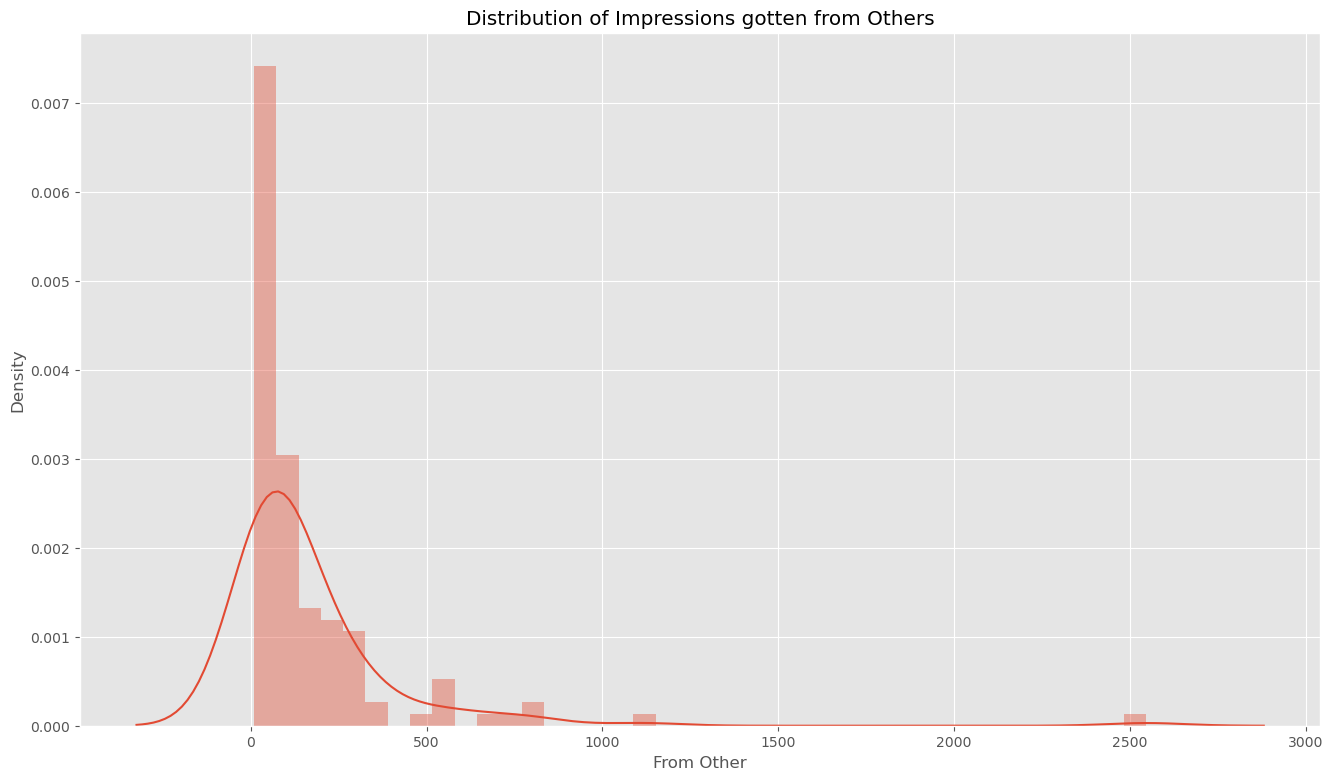

In [8]:
# Distribution plot of Impressions gotten from Others
plt.figure(figsize=(16,9))
plt.title('Distribution of Impressions gotten from Others')
sns.distplot(df["From Other"])
plt.show()

In [9]:
labels = ["From Home","From Hashtags","From Explore","From Other"]
values = [df["From Home"].sum(),df["From Hashtags"].sum(), df["From Explore"].sum(),df["From Other"].sum()]

px.pie(values=values,names=labels,
       title='Impressions on Instagram posts gotten from various sources',
       hole=0.3)

This shows that most of the impressions are from Home

Lets create a wordcloud showing the hashtags 

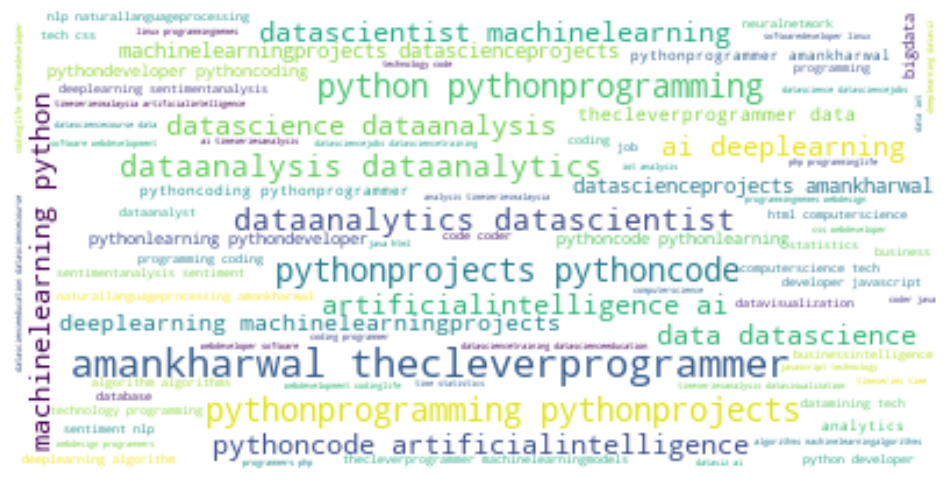

In [10]:
# Analyzing the most used hashtags
text = "".join([i for i in df.Hashtags])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)

plt.figure(figsize=(12,20))
plt.style.use("classic")
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

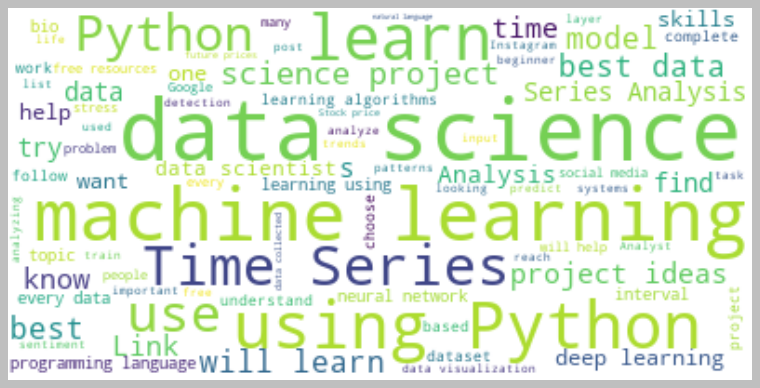

In [11]:
# Lets also analyze the the most used captions
text = "".join([i for i in df.Caption])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)

plt.figure(figsize=(12,20))
plt.style.use("classic")
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Analyzing Linear Relationship between the features

In [12]:
df.columns


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [13]:
px.scatter(df, x='Impressions',size= 'Likes' ,y = 'Likes',
           trendline='ols',
           title='Relationship between Likes and Impressions')

This shows that more likes will guarantee a higher reach of our post

In [14]:
px.scatter(df, x='Impressions',size= 'Shares' ,y = 'Shares',
           trendline='ols',
           title='Relationship between Shares and Impressions')

The number of shares also have a positve linear relationship with the reach of a post

In [15]:
plt.figure(figsize=(16,9))
px.scatter(df, x='Impressions',size= 'Comments' ,y = 'Comments',trendline='ols')

<Figure size 1280x720 with 0 Axes>

The number of comments doesnt have a great impact on the reach of a post

In [16]:
px.scatter(df, x='Impressions',size= 'Saves' ,y = 'Saves',
           trendline='ols',title='Relationship btw Saves and Impressions')

In [17]:
# Lets check the correlations of the other features to the Impressions gotten
corr = df.corr()
corr['Impressions'].sort_values(ascending=False
                               )

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

# Seperating into features and target variable

In [18]:
# We gonna use the likes,shares,saves,Profilevisits,follows as our feature variables
X = df[['Likes','Shares','Follows','Profile Visits','Saves']]
y = df["Impressions"] # target variable




In [19]:
# Lets split the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)


In [27]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (95, 5)
y_train shape: (95,)
X_test shape: (24, 5)
y_test shape: (24,)


# Model

Lets a create a Ml model that can predict the reach of an Instagram Post

In [21]:
params = {'n_estimators':[100,200,400,1000],'max_depth':[2,3,4,5],
          'max_leaf_nodes':[10,20,30,50,40],'subsample':[0.5,1.0]}
from sklearn.model_selection import GridSearchCV

In [22]:
cv = GridSearchCV(GradientBoostingRegressor(random_state=2),params,refit=True,verbose=3,n_jobs=-1)

In [23]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [10, 20, 30, 50, 40],
                         'n_estimators': [100, 200, 400, 1000],
                         'subsample': [0.5, 1.0]},
             verbose=3)

In [24]:
cv.best_params_

{'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 100, 'subsample': 1.0}

In [25]:
model = GradientBoostingRegressor(n_estimators=100,max_depth=4,random_state=2)

model.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=4, random_state=2)

In [26]:
print('Score:' + str(round(model.score(X_test,y_test),3) * 100) +'%')

Score:74.6%
